**Importing Libraries**

In [1]:
import sklearn_pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
import spacy
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from spacy import displacy
from collections import Counter


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Data Loading & EDA**

In [2]:
data=pd.read_csv('/content/ctg-studies.csv')

In [3]:
data.columns  #Column names

Index(['NCT Number', 'Study Title', 'Study URL', 'Acronym', 'Study Status',
       'Brief Summary', 'Study Results', 'Conditions', 'Interventions',
       'Primary Outcome Measures', 'Secondary Outcome Measures',
       'Other Outcome Measures', 'Sponsor', 'Collaborators', 'Sex', 'Age',
       'Phases', 'Enrollment', 'Funder Type', 'Study Type', 'Study Design',
       'Other IDs', 'Start Date', 'Primary Completion Date', 'Completion Date',
       'First Posted', 'Results First Posted', 'Last Update Posted',
       'Locations', 'Study Documents'],
      dtype='object')

In [4]:
data.head()  #data values

,NCT Number,Study Title,Study URL,Acronym,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,...,Study Design,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents
0,NCT00588445,Phase II Trial to Correlate Radiographic Respo...,https://clinicaltrials.gov/study/NCT00588445,NaN,COMPLETED,The purpose of this research study is to:\n\n*...,YES,Lung Cancer|Non-small Cell Lung Cancer|Bronchi...,DRUG: Gefitinib,"The Radiographic Response to Gefitinib, Radiog...",...,Allocation: NA|Intervention Model: SINGLE_GROU...,04-071|CA113653,2004-06,2010-09,2010-09,2008-01-08,2015-12-17,2016-01-22,"Memorial Sloan-Kettering Cancer Center, New Yo...",NaN
1,NCT01540045,Effect of Chemotherapy With Paclitaxel/Cisplat...,https://clinicaltrials.gov/study/NCT01540045,NaN,COMPLETED,One of the most widely used treatments for non...,YES,Non-Small Cell Lung Cancer|Dysgeusia|Taste Dis...,NaN,"Dysgeusia (UMAMI Perception), Describe the thr...",...,Observational Model: |Time Perspective: p,ECPCDLC2012,2010-12,2011-12,2012-05,2012-02-28,2013-07-23,2015-03-18,"National Cancer Institute of Mexico, Mexico ci...",NaN
2,NCT02898116,"Phase 1/2 Study of Ensartinib and Durvalumab, ...",https://clinicaltrials.gov/study/NCT02898116,NaN,COMPLETED,"This was a Phase 1/2, open-label, multicenter,...",YES,Non-small Cell Lung Cancer|Carcinoma|NSCLC,DRUG: Ensartinib|DRUG: Durvalumab,Number of Subjects With Treatment-emergent Adv...,...,Allocation: NA|Intervention Model: SINGLE_GROU...,LUD2014-012-ALK,2017-05-10,2017-08-04,2017-08-04,2016-09-13,2018-07-26,2022-10-10,"Research Facility, New York, New York, 10016, ...","Study Protocol and Statistical Analysis Plan, ..."
3,NCT01551082,Outpatient Chest Tube Management Following Tho...,https://clinicaltrials.gov/study/NCT01551082,NaN,TERMINATED,Discharging patients home with air leak and ch...,YES,Lung Cancer|Pneumothorax|Subcutaneous Emphysema,NaN,Outpatient Chest Tube Management Following Tho...,...,Observational Model: |Time Perspective: p,MEM Chest tube study,2012-03,2014-01,2014-01,2012-03-12,2016-07-13,2016-12-12,"Memorial Hospital, Chattanooga, Tennessee, 374...",NaN
4,NCT02014116,A Study of LY3009120 in Participants With Adva...,https://clinicaltrials.gov/study/NCT02014116,NaN,TERMINATED,The main purpose of this study is to see how s...,YES,Neoplasms|Neoplasm Metastasis|Melanoma|Carcino...,DRUG: LY3009120 capsule,"Maximum Tolerated Dose (MTD) of LY3009120, Max...",...,Allocation: NON_RANDOMIZED|Intervention Model:...,13873|I6X-MC-JBDA,2013-11-26,2017-04-07,2018-10-05,2013-12-18,2019-09-17,2019-12-27,"Pinnacle Oncology Hematology, Scottsdale, Ariz...","Study Protocol, https://storage.googleapis.com..."


In [5]:
data.shape  #no. or rows and columns

(1652, 30)

In [6]:
data.info() #to check data type,missing value etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   NCT Number                  1652 non-null   object
 1   Study Title                 1652 non-null   object
 2   Study URL                   1652 non-null   object
 3   Acronym                     272 non-null    object
 4   Study Status                1652 non-null   object
 5   Brief Summary               1652 non-null   object
 6   Study Results               1652 non-null   object
 7   Conditions                  1652 non-null   object
 8   Interventions               1626 non-null   object
 9   Primary Outcome Measures    1652 non-null   object
 10  Secondary Outcome Measures  1434 non-null   object
 11  Other Outcome Measures      129 non-null    object
 12  Sponsor                     1652 non-null   object
 13  Collaborators               676 non-null    obje

In [7]:
data.describe() #check statistics of int type column

,Enrollment
count,1.652000e+03
mean,1.893880e+03
std,5.748801e+04
min,1.000000e+00
25%,2.100000e+01
50%,5.350000e+01
75%,1.560000e+02
max,2.323608e+06


In [8]:
data.isnull().sum()   #to check missing values or nan values

NCT Number                       0
Study Title                      0
Study URL                        0
Acronym                       1380
Study Status                     0
Brief Summary                    0
Study Results                    0
Conditions                       0
Interventions                   26
Primary Outcome Measures         0
Secondary Outcome Measures     218
Other Outcome Measures        1523
Sponsor                          0
Collaborators                  976
Sex                              1
Age                              0
Phases                         215
Enrollment                       0
Funder Type                      0
Study Type                       0
Study Design                     0
Other IDs                        0
Start Date                       0
Primary Completion Date          1
Completion Date                 23
First Posted                     0
Results First Posted             0
Last Update Posted               0
Locations           

In [9]:
[features for features in data.columns if data[features].isnull().sum()>0]   #Column names having missing values

['Acronym',
 'Interventions',
 'Secondary Outcome Measures',
 'Other Outcome Measures',
 'Collaborators',
 'Sex',
 'Phases',
 'Primary Completion Date',
 'Completion Date',
 'Locations',
 'Study Documents']

In [10]:
#Handling Missing Values
data['Acronym'] = data['Acronym'].fillna(" ")
data['Interventions'] = data['Interventions'].fillna(" ")
data['Secondary Outcome Measures'] = data['Secondary Outcome Measures'].fillna(" ")
data['Other Outcome Measures'] = data['Other Outcome Measures'].fillna(" ")
data['Collaborators'] = data['Collaborators'].fillna(" ")
data['Phases'] = data['Phases'].fillna(" ")
data['Primary Completion Date'] = data['Primary Completion Date'].fillna(" ")
data['Completion Date'] = data['Completion Date'].fillna(" ")
data['Locations'] = data['Locations'].fillna(" ")

Handling missing values by filling them with empty strings is a temporary solution for applying functions or visualizing the data. Later, these missing values can be replaced using various imputation methods tailored to the data types of the respective columns.

In [11]:
# data.head()

In [12]:
data.duplicated().sum() # To Check any duplicate values

0

In [13]:
data.nunique() #No. of unique value in every column

NCT Number                    1652
Study Title                   1650
Study URL                     1652
Acronym                        267
Study Status                     5
Brief Summary                 1649
Study Results                    1
Conditions                     776
Interventions                 1492
Primary Outcome Measures      1648
Secondary Outcome Measures    1434
Other Outcome Measures         130
Sponsor                        370
Collaborators                  285
Sex                              3
Age                              6
Phases                           8
Enrollment                     462
Funder Type                      6
Study Type                       2
Study Design                    97
Other IDs                     1652
Start Date                     876
Primary Completion Date        842
Completion Date                857
First Posted                  1287
Results First Posted          1263
Last Update Posted            1115
Locations           



*   column with most duplicates  are age,sex,phases,funder type,study type,study results.



In [14]:
#Apply Preprocessor to each column
Cols = ['Study Title', 'Acronym', 'Study Status', 'Brief Summary', 'Study Results', 'Conditions', 'Interventions', 'Primary Outcome Measures', 'Secondary Outcome Measures', 'Other Outcome Measures', 'Sponsor', 'Collaborators', 'Sex', 'Phases', 'Funder Type', 'Study Type', 'Study Design', 'Locations', 'Study Documents']

def preprocessor(text):
    if isinstance(text, str):
        text = re.sub('<[^>]*>', '', text)
        emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
        text = re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', '')
        return text
    else:
        return str(text)  # Convert non-string data to string representation

for column in Cols:
    data[column] = data[column].apply(preprocessor)


Defined a function to clean text as observed there are some duplicates but due to Lower and upper alphabets they are not counted as duplicates.

In [15]:
data.Sex.value_counts()

all       1632
female      13
male         6
nan          1
Name: Sex, dtype: int64

Given that 1632 out of 1652 entries already have 'all' as their value in a particular column, the single missing value (NaN) can be replaced with 'all', aligning with the prevalent choice observed in the majority of the dataset.


There are more entries indicating females compared to males. However, among the total 1652 entries, 1632 share identical values for both genders, suggesting that this study doesn't provide specific or comparative information based on gender.

In [16]:
data.Sex.unique()

array(['all', 'female', 'male', 'nan'], dtype=object)

In [17]:
data['Sex'].fillna("ALL", inplace=True)
#Handling Missing Values For AGE

In [18]:
data.Age.value_counts()

ADULT, OLDER_ADULT           1565
CHILD, ADULT, OLDER_ADULT      44
OLDER_ADULT                    28
CHILD, ADULT                   10
ADULT                           3
CHILD                           2
Name: Age, dtype: int64

Age is not defined properly .most common is adult but age bracket is not specified.

In [19]:
data.Phases.value_counts()

phase2           784
phase3           236
                 215
phase1 phase2    215
phase1           144
phase4            35
phase2 phase3     20
early_phase1       3
Name: Phases, dtype: int64

unique phases are only 4

In [20]:
data.Sponsor.value_counts()

national cancer institute nci     128
eli lilly and company              93
hoffmann la roche                  71
pfizer                             59
astrazeneca                        50
                                 ... 
transgene                           1
oncoethix gmbh                      1
karyopharm therapeutics inc         1
chinese pla general hospital        1
obi pharma inc                      1
Name: Sponsor, Length: 370, dtype: int64

Top Three Sponsored are nci,eli lilly,hoffmann la roche.

In [21]:
data.Collaborators.value_counts()

                                                                                                                                         976
national cancer institute nci                                                                                                            184
merck sharp dohme llc                                                                                                                     23
bristol myers squibb                                                                                                                      23
astrazeneca                                                                                                                               19
                                                                                                                                        ... 
hoffmann la roche                                                                                                                          1
aarhus univer

976 rows have values in which 285 are unique.

nci is leading here too.



In [22]:
# collab_counts = data['Collaborators'].value_counts()

# # Plotting the value counts
# plt.figure(figsize=(10, 8))
# collab_counts[2:52].plot(kind='bar')
# plt.title('Top Collaborators')
# plt.xlabel('Collaborator Names')
# plt.ylabel('Frequency')
# plt.xticks(rotation=45)
# plt.show()

In [23]:
data.Conditions.value_counts()

non small cell lung cancer                                                                                                                                                                                                                                                                                         296
lung cancer                                                                                                                                                                                                                                                                                                        192
carcinoma non small cell lung                                                                                                                                                                                                                                                                                      129
small cell lung cancer                                             

Types of cancer mostly studied are
* non small lung cancer,
* lung cancer,
* carcinoma non small cell lung cancer,
* small cell lung cancer.





In [24]:
data.Interventions.value_counts()

                                                                                                                        26
drug erlotinib                                                                                                          19
drug dasatinib                                                                                                           9
drug erlotinib tarceva                                                                                                   9
drug afatinib                                                                                                            8
                                                                                                                        ..
other laboratory biomarker analysis biological muc1 peptide poly iclc vaccine                                            1
genetic manganese superoxide dismutase plasmid liposome drug carboplatin drug paclitaxel radiation radiation therapy     1
drug ag 013736 d

Mostly Occured 4 Drugs name are:
* erlotinib
* dasatinib
* erlotinib tarceva
* afatinib

In [25]:
data.Locations.value_counts()

need to work on it more as value count is not giving exact insights about location.

In [26]:
data["Study Status"].value_counts() # Complete data

completed                1131
terminated                413
active_not_recruiting      99
unknown                     8
suspended                   1
Name: Study Status, dtype: int64

In [27]:
data["Study Results"].value_counts() #one type data only

yes    1652
Name: Study Results, dtype: int64

In [28]:
data["Study Title"].value_counts()

tisotumab vedotin humax tf adc safety study in patients with solid tumors                                                                               2
a study in non small cell lung cancer                                                                                                                   2
sputum labeling utilizing synthetic meso tetra 4 carboxyphenyl porphine tcpp for detection of lung cancer                                               2
afatinib in nsclc with her2 mutation                                                                                                                    2
phase ii trial to correlate radiographic response induced by gefitinib with mutations in the protein tyrosine kinase domain of the egf receptor gene    1
                                                                                                                                                       ..
a study of iressa treatment beyond progression in addition to chemotherapy v

need to apply NER to extract most studied topic.

In [29]:
#other import step is done in first row already.

stop = set(stopwords.words('english'))



<BarContainer object of 10 artists>

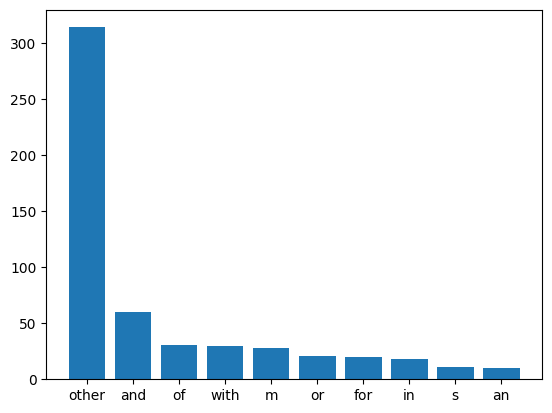

In [30]:
#Creating Corpus for interventions
corpus=[]
new= data['Interventions'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

#Plotting Top 10 Frequent Stop Words

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
x,y=zip(*top)
plt.bar(x,y)

['radiation', 'carboplatin', 'biological', 'pemetrexed', 'paclitaxel', 'placebo', 'cisplatin', 'erlotinib', 'procedure', 'docetaxel', 'therapy', 'analysis', 'gemcitabine', 'bevacizumab', 'biomarker', 'laboratory', 'mg', 'pembrolizumab', 'device', 'nivolumab', 'hydrochloride', 'behavioral', 'etoposide', 'stereotactic', 'ipilimumab', 'pf', '2', 'cetuximab', 'chemotherapy', 'gefitinib', 'radiotherapy', 'care', 'tarceva', 'nab', 'atezolizumab', 'surgery']
[333, 289, 286, 235, 203, 194, 193, 192, 160, 142, 133, 125, 125, 110, 101, 100, 93, 79, 75, 72, 71, 54, 54, 42, 40, 40, 40, 39, 34, 33, 33, 32, 31, 31, 31, 31]


<Axes: >

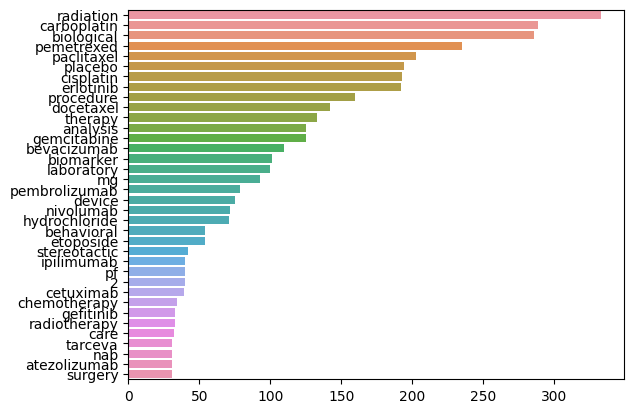

In [31]:
#Most Common word in INTERVENTION column other than stop words or to extraxt Commmon Drug names
from collections import Counter
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[1:40]: #Removed Word Drug
    if (word not in stop):
        x.append(word)
        y.append(count)
print(x)
print(y)

sns.barplot(x=y,y=x)

**Most Used cancer treatments and medical interventions are Plotted and printed with their frequency**

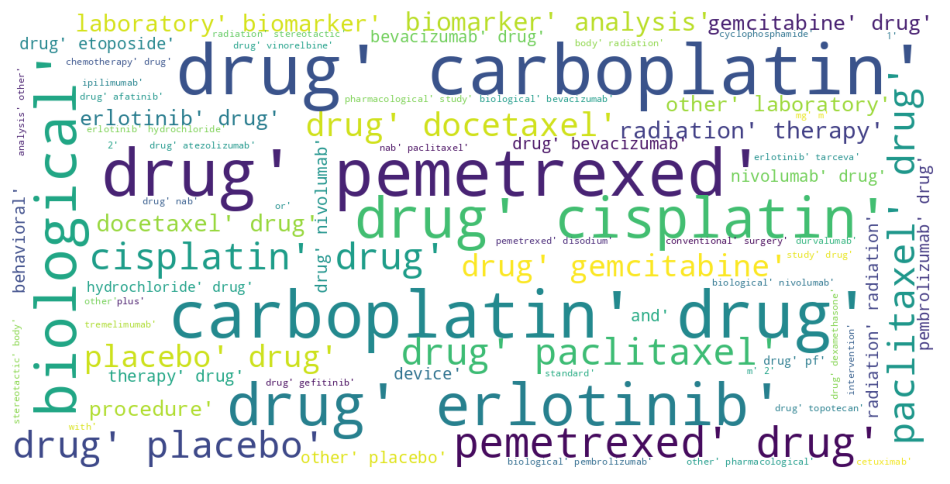

In [32]:
#Visualising These word through word cloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

In [33]:
#Downloading libraries to use spacy
!python -m spacy download en_core_web_sm


2023-11-20 07:51:42.328686: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-20 07:51:42.328761: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-20 07:51:42.328794: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-20 07:51:44.055859: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 80.4 MB/s eta 0:00:00
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.6.0
    Uninstalling en-core-web-sm-3.6.0:
      Successfully uninst

In [34]:
!pip install -U spacy




In [35]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_sm-0.4.0.tar.gz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 25.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.5/659.5 kB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 8.8 MB/s eta 0:00:00
  Created wheel for en-core-sci-sm: filename=en_core_sci_sm-0.4.0-py3-none-any.whl size=15660332 sha256=05098f709dcdc63d7720973a64c12163c07f1e37ef4bd8526e3c73f15105616a
  Stored in directory: /root/.cache/pip/wheels/d6/5d/cd/0752b58bc0a19cb9465c6db6e7a4e7c490c6f6cece8f8f6bcf
Successfully built en-core-sci-sm
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.2
    Uninstalling wasabi-1.1.2:
      Successfully uninstalled wasabi-1.1.2
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.13
    Unin

In [36]:
# Loading the scispacy model for clinical NER
nlp = spacy.load("en_core_sci_sm")

/usr/local/lib/python3.10/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_sci_sm' (0.4.0) was trained with spaCy v3.0.1 and may not be 100% compatible with the current version (3.7.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  


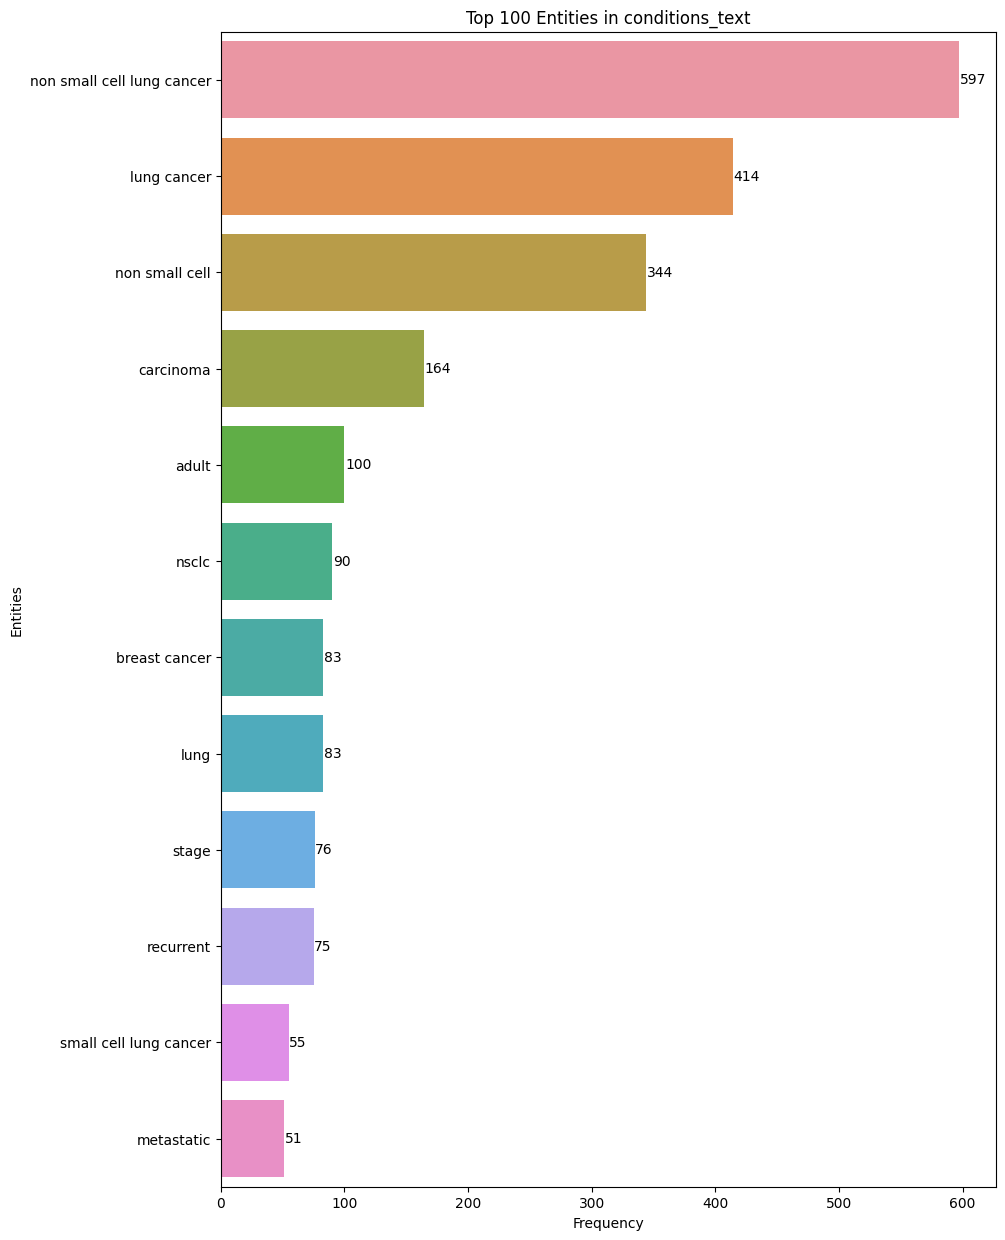

In [37]:
#Doing NER on Condition column
conditions_text = data['Conditions']
# Storing the entity types
def ner(text):
    doc = nlp(text)
    return [X.text for X in doc.ents]

# Applying clinical NER to each study title
ent = conditions_text.apply(lambda x: ner(x))
ent = [x for sub in ent for x in sub]

# Get the top 100 entities
counter = Counter(ent)
count = counter.most_common(12)
x, y = map(list, zip(*count))

# Create a bar plot for the top entities
plt.figure(figsize=(10, 15))
ax = sns.barplot(x=y, y=x)

# Annotate bars with frequencies
for i, v in enumerate(y):
    ax.text(v + 0.5, i, str(v), color='black', va='center')

plt.title('Top 100 Entities in conditions_text')
plt.xlabel('Frequency')
plt.ylabel('Entities')
plt.show()

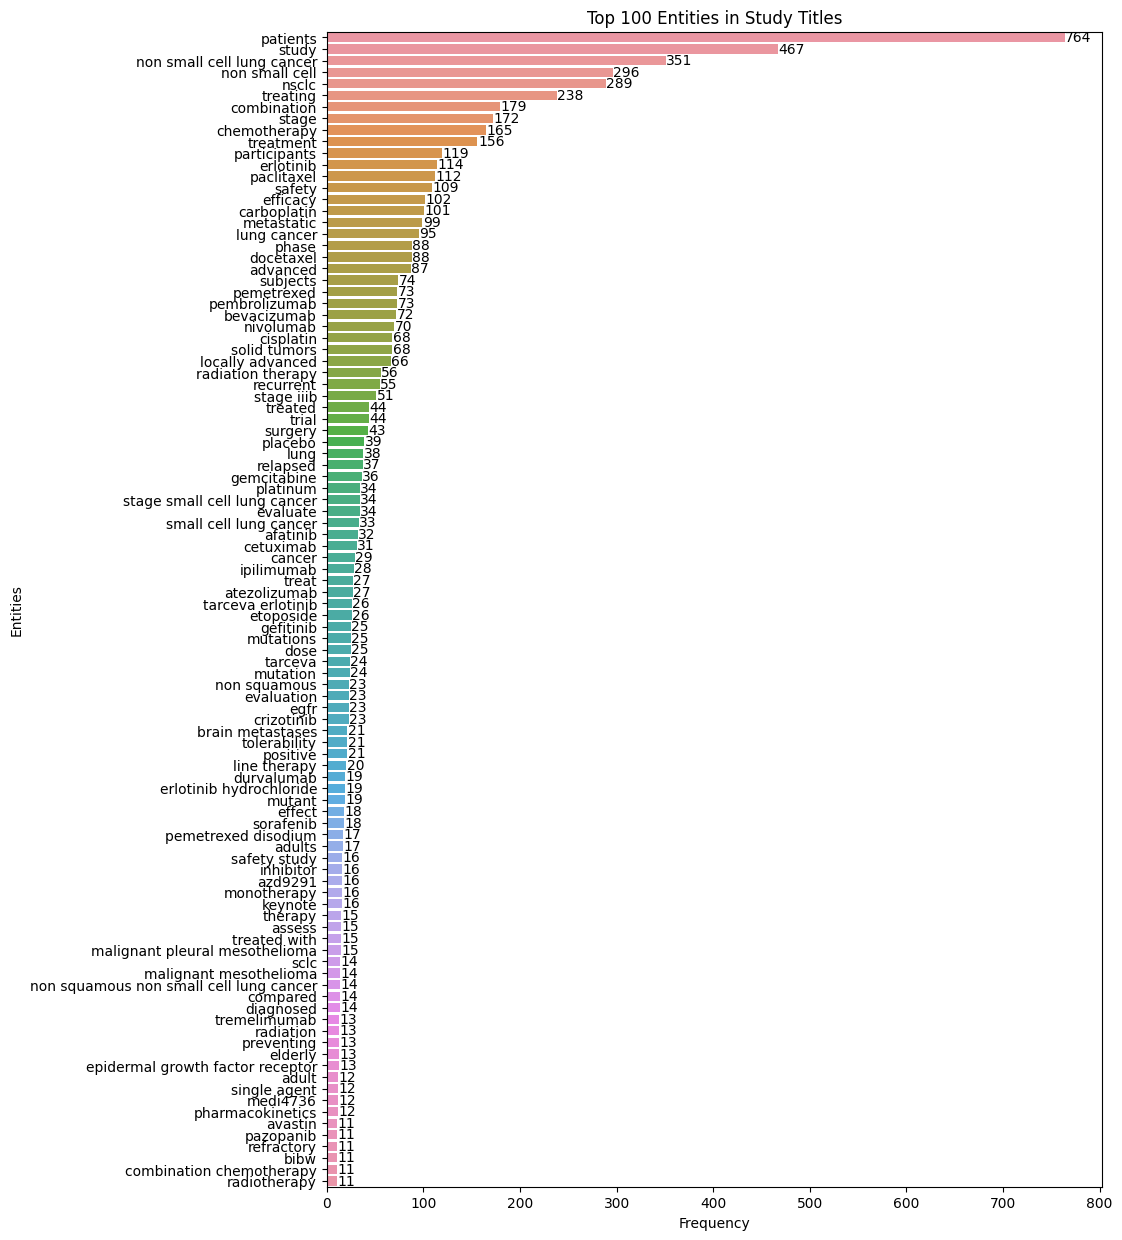

In [38]:
study_titles = data['Study Title']

# Storing the entity types
def ner(text):
    doc = nlp(text)
    return [X.text for X in doc.ents]

# Applying clinical NER to each study title
ent = study_titles.apply(lambda x: ner(x))
ent = [x for sub in ent for x in sub]
print(x)

# Get the top 100 entities
counter = Counter(ent)
count = counter.most_common(100)
x, y = map(list, zip(*count))

# Create a bar plot for the top entities
plt.figure(figsize=(10, 15))
ax = sns.barplot(x=y, y=x)

# Annotate bars with frequencies
for i, v in enumerate(y):
    ax.text(v + 0.5, i, str(v), color='black', va='center')

plt.title('Top 100 Entities in Study Titles')
plt.xlabel('Frequency')
plt.ylabel('Entities')
plt.show()


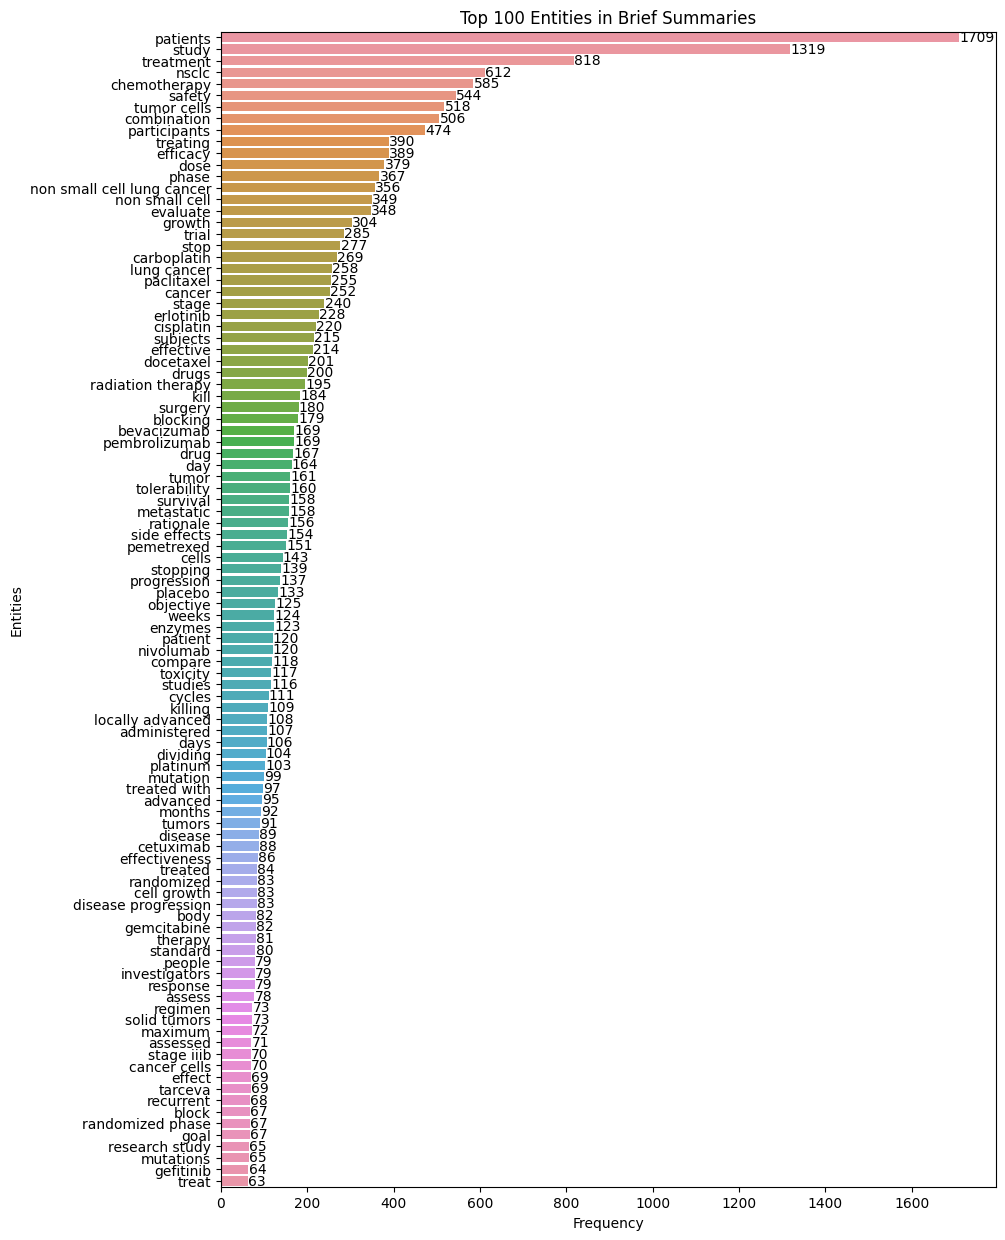

In [39]:
brief_summaries = data['Brief Summary']

# Applying clinical NER to each brief summary
ent_summary = brief_summaries.apply(lambda x: ner(x))
ent_summary = [x for sub in ent_summary for x in sub]

# Getting the top 100 entities from brief summaries
counter_summary = Counter(ent_summary)
count_summary = counter_summary.most_common(100)
x_summary, y_summary = map(list, zip(*count_summary))

# Create a bar plot for the top entities in brief summaries
plt.figure(figsize=(10, 15))
ax_summary = sns.barplot(x=y_summary, y=x_summary)

# Annotate bars with frequencies
for i, v in enumerate(y_summary):
    ax_summary.text(v + 0.5, i, str(v), color='black', va='center')

plt.title('Top 100 Entities in Brief Summaries')
plt.xlabel('Frequency')
plt.ylabel('Entities')
plt.show()


Brief study and study title comparison can be visualised.

                                            Sponsor  \
0            memorial sloan kettering cancer center   
1      instituto nacional de cancerologia de mexico   
2              ludwig institute for cancer research   
3  alliance of cardiothoracic and vascular surgeons   
4                             eli lilly and company   

                                     SponsorEntities  
0                         [(memorial sloan, ENTITY)]  
1  [(instituto, ENTITY), (nacional de cancerologi...  
2  [(ludwig institute, ENTITY), (cancer research,...  
3  [(alliance, ENTITY), (cardiothoracic, ENTITY),...  
4               [(lilly, ENTITY), (company, ENTITY)]  


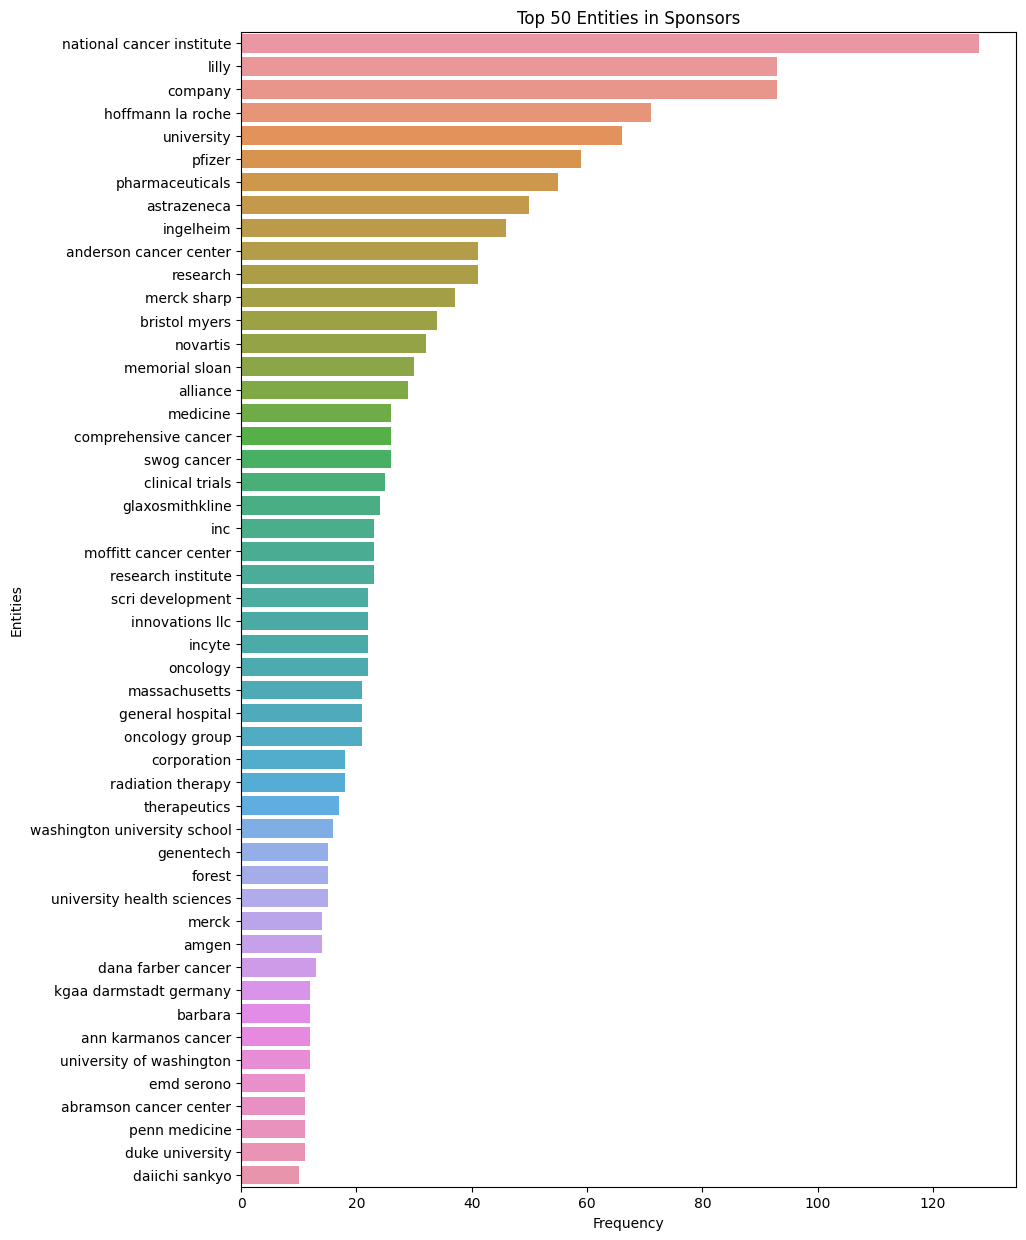

In [40]:
#Analysing Sponsor column
sponsors_text = data['Sponsor']

# Process each text in the 'Sponsor' column with the clinical NER model
sponsor_entities = []
for text in sponsors_text:
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    sponsor_entities.append(entities)

# Add a new column 'SponsorEntities' containing the extracted entities
data['SponsorEntities'] = sponsor_entities

# Display the extracted entities and their labels for the first few rows
print(data[['Sponsor', 'SponsorEntities']].head())

# Store the entity types
def ner(text):
    doc = nlp(text)
    return [X.text for X in doc.ents]

ent = data['Sponsor'].apply(lambda x: ner(x))
ent = [x for sub in ent for x in sub]

counter = Counter(ent)
count = counter.most_common(50)  # Get the top 50 entities
x, y = map(list, zip(*count))

# Create a bar plot for the top 50 entities using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 15))  # Adjust figure size as needed
sns.barplot(x=y, y=x)
plt.title('Top 50 Entities in Sponsors')
plt.xlabel('Frequency')
plt.ylabel('Entities')
plt.show()


                                       Collaborators  \
0                                                      
1                                                      
2  medimmune llc xcovery holding company llc canc...   
3                                                      
4                                                      

                                CollaboratorEntities  
0                                                 []  
1                                                 []  
2  [(medimmune, ENTITY), (york, ENTITY), (city, E...  
3                                                 []  
4                                                 []  


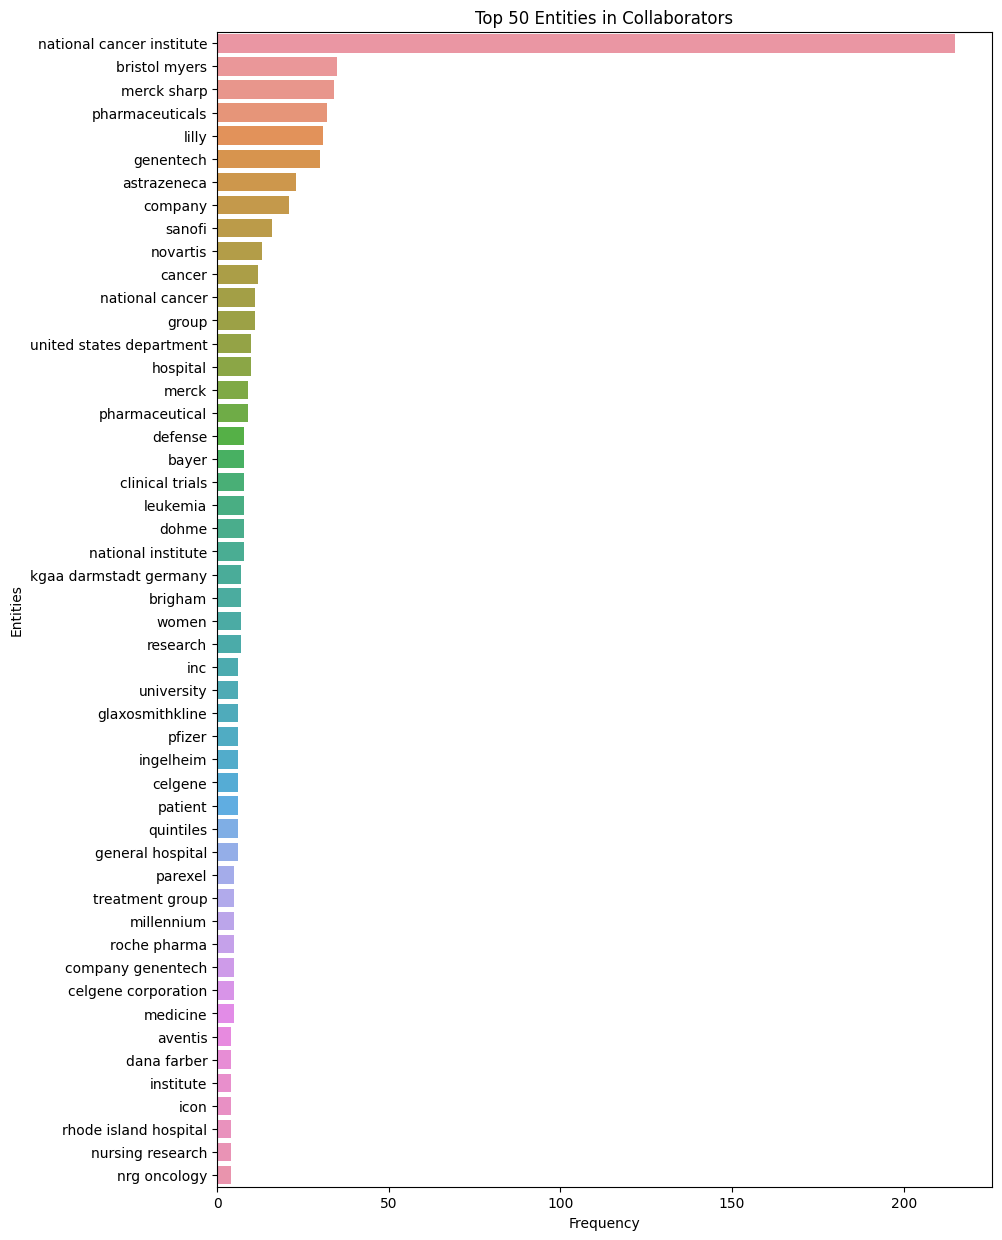

In [41]:
#Finding Top Collaborators
collaborators_text = data['Collaborators']

# Process each text in the 'Collaborators' column with the clinical NER model
collaborator_entities = []
for text in collaborators_text:
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    collaborator_entities.append(entities)

# Add a new column 'CollaboratorEntities' containing the extracted entities
data['CollaboratorEntities'] = collaborator_entities

# Display the extracted entities and their labels for the first few rows
print(data[['Collaborators', 'CollaboratorEntities']].head())

# Store the entity types
def ner(text):
    doc = nlp(text)
    return [X.text for X in doc.ents]

ent = data['Collaborators'].apply(lambda x: ner(x))
ent = [x for sub in ent for x in sub]

counter = Counter(ent)
count = counter.most_common(50)  # Get the top 50 entities
x, y = map(list, zip(*count))

# Create a bar plot for the top 50 entities using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 15))  # Adjust figure size as needed
sns.barplot(x=y, y=x)
plt.title('Top 50 Entities in Collaborators')
plt.xlabel('Frequency')
plt.ylabel('Entities')
plt.show()


In [44]:
!python -m spacy download en_core_web_sm

2023-11-20 07:59:10.283164: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-20 07:59:10.283251: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-20 07:59:10.283303: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-20 07:59:11.806765: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
DEPRECATION: https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0-py3-none-any.whl#egg=en_core_web_sm==3.0.0 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this beha

In [46]:
import spacy

# Load the model
nlps = spacy.load("en_core_web_sm")


/usr/local/lib/python3.10/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0.0 and may not be 100% compatible with the current version (3.7.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  


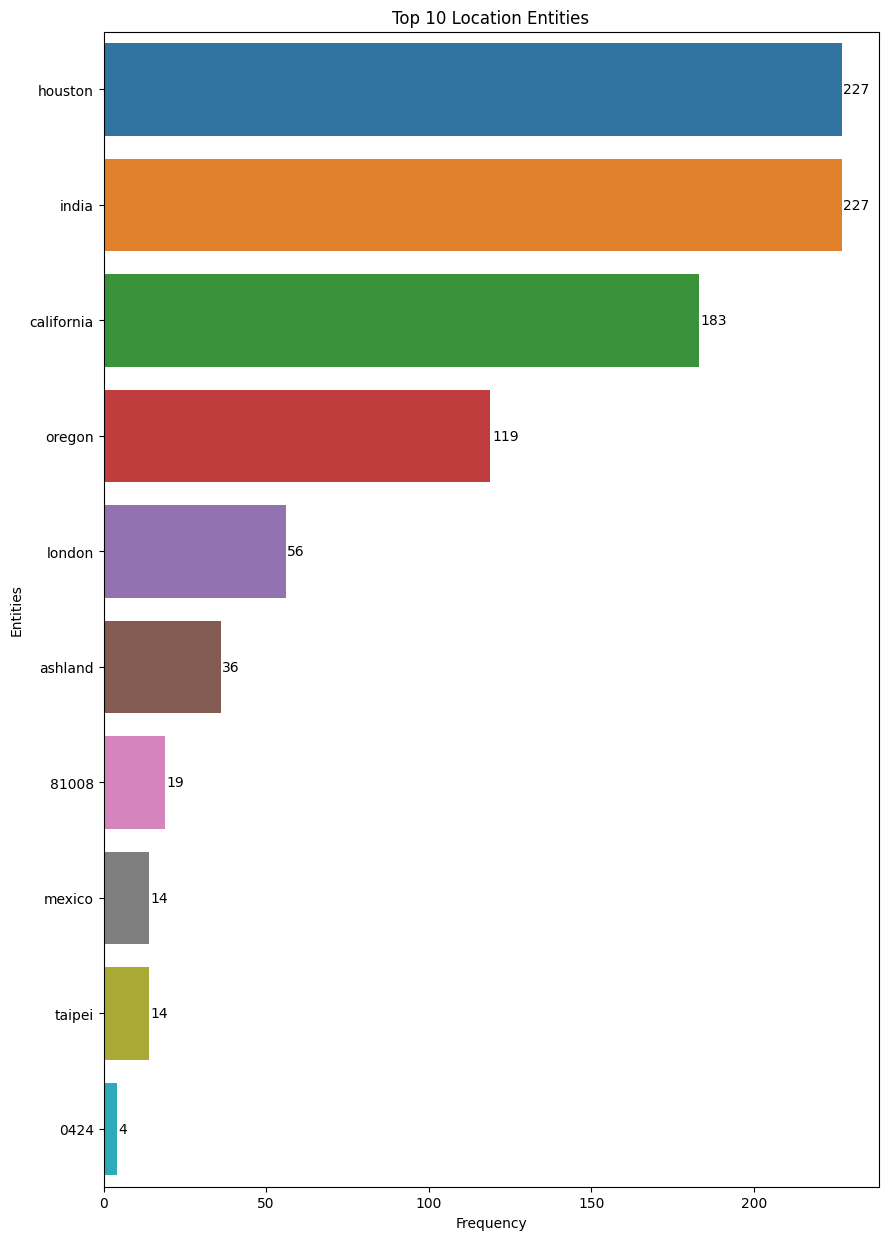

In [47]:
# Searching most frequent locations in data
locations = data['Locations']

# Store the entity types
def ner(text):
    doc = nlps(text)
    return [X.text for X in doc.ents if X.label_ == 'GPE']  # Filter for geopolitical entities

# Apply clinical NER to each location
ent = locations.apply(lambda x: ner(x))
ent = [x for sub in ent for x in sub]

# Get the top 100 location entities
counter = Counter(ent)
count = counter.most_common(10)
x, y = map(list, zip(*count))

# Create a bar plot for the top entities
plt.figure(figsize=(10, 15))
ax = sns.barplot(x=y, y=x)

# Annotate bars with frequencies
for i, v in enumerate(y):
    ax.text(v + 0.5, i, str(v), color='black', va='center')

plt.title('Top 10 Location Entities')
plt.xlabel('Frequency')
plt.ylabel('Entities')
plt.show()
